<a href="https://colab.research.google.com/github/Amelrich/Capstone-Fall-2020/blob/kassie-preprocessing/preprocessing_DCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing  import MinMaxScaler

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read saved data that was created using Amaurys code by using this
`TS_generator(nb_timeseries=4000, chunk_size=60)`

In [33]:
X = np.load("/content/drive/My Drive/capstone/timeseries.npy")

### Scale before DCT 

In [34]:
X_Scaled = []
for df in X:
  scaler = MinMaxScaler()
  X_Scaled.append(scaler.fit_transform(df[:,0].reshape(-1, 1)).reshape(1,-1)[0])
  

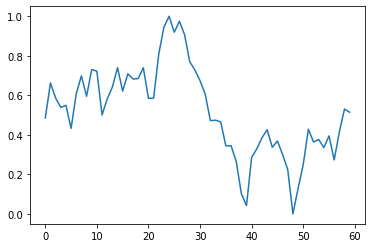

In [35]:
plt.plot(X_Scaled[0])

### DCT preprocessing

In [36]:
from dct_lowpass_filter import DCT_lowpass_filter

lowpass_filter = DCT_lowpass_filter()
X_dct_reconstructed = lowpass_filter.fit_transform(np.array(X_Scaled))
X_dct = lowpass_filter.X_dct
n_dct = lowpass_filter.nb_coefs


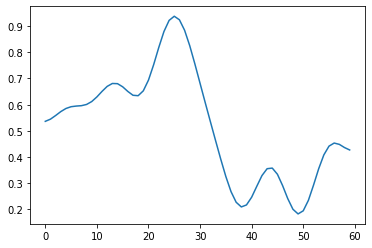

In [37]:
plt.plot(X_dct_reconstructed[0])

### How we achieve multiscale data points

Two methods

* By picking prices every consecutive, alterate and every 2 days 

* By picking consecutive prices for 50, 100, 150 days.

Please see methods `get_multiscale_skipped_values` and `get_multiscale_consecutive_values`



In [38]:
def get_multiscale_skipped_values(df_start_end):
  days_60 = df_start_end[-60:]
  days_40 = [0 if i % 2 else x for i, x in enumerate(days_60)]
  days_20 = [0 if i % 3 else x for i, x in enumerate(days_60)]
  dictionary = {'60_days': np.array(days_60), '40_days': np.array(days_40), 
                '20_days': np.array(days_20)}
  return dictionary

def get_multiscale_consecutive_values(df_start_end):
  days_20 = df_start_end[-20:]
  days_40 = df_start_end[-40:]
  days_60 = df_start_end[-60:]
  
  days_20_all = np.append(np.zeros((40)), days_20 ,0)
  days_40_all = np.append(np.zeros((20)), days_40,0)
  
  dictionary = {'20_days': np.array(days_20_all), '40_days': np.array(days_40_all),
                    '60_days': days_60}
  return dictionary


skipped_values = []
consecutive_values = []
n = 0
for df in X_dct_reconstructed:
 
  n = n + 1
  if n%1000 == 0:
    print("{} stocksout of {} completed".format(n,len(X_dct_reconstructed)))
  
  dictionary_skipped_values = get_multiscale_skipped_values(df)
  dictionary_consecutive_values = get_multiscale_consecutive_values(df)
 
  datapoint_skipped_values = pd.DataFrame(dictionary_skipped_values).to_numpy()
  datapoint_consecutive_values = pd.DataFrame(dictionary_consecutive_values).to_numpy()


  skipped_values.append(datapoint_skipped_values)
  consecutive_values.append(datapoint_consecutive_values)


1000 stocksout of 4000 completed
2000 stocksout of 4000 completed
3000 stocksout of 4000 completed
4000 stocksout of 4000 completed


In [39]:
np.save("/content/drive/My Drive/capstone/skipped_values_DCT.npy", skipped_values)
np.save("/content/drive/My Drive/capstone/consecutive_values_DCT.npy", consecutive_values)

## Visualization of data points

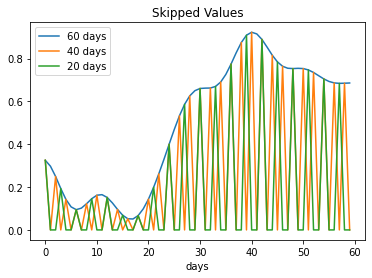

In [40]:
from matplotlib import pyplot as plt 

fig, ax = plt.subplots()
lines = ax.plot(datapoint_skipped_values)
ax.set_title("Skipped Values") 
ax.set(xlabel='days')
ax.legend(['60 days', '40 days', '20 days'])

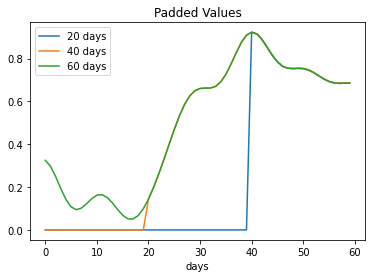

In [41]:
from matplotlib import pyplot as plt 

fig, ax = plt.subplots()
lines = ax.plot(datapoint_consecutive_values)
ax.set_title("Padded Values") 
ax.set(xlabel='days')
ax.legend(['20 days', '40 days', '60 days'])